# Исследование рынка компьютерных игр

Введение: Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Цель проекта: Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

План работы:
1. Загрузка данных.
2. Подготовка данных.
3. Исследовательский анализ данных.
4. Портрет пользователя каждого региона.
5. Проверка гипотез.
6. Общий вывод.

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Датасет. Путь к файлу: /datasets/games.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
from scipy import stats as st

## Загрузка данных.

In [2]:
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывел первые строки каждого набора данных. Изучил общую информацию о датафрейме.

## Подготовка данных.

In [4]:
# Меняю названия столбцов на нижний регистр
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Удаляем строки с пропущенным годом выпуска
games = games.dropna(subset=['year_of_release'])
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

In [7]:
games = games.dropna(subset=['name'])
games = games.dropna(subset=['genre'])

In [8]:
print(games['user_score'].unique())
(games['user_score']=='tbd').sum()

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


2376

TBD (To Be Determined) – английская аббревиатура, которая означает «будет определено» или «будет установлено». Она используется для указания на неопределенность или незавершенность чего-либо на данный момент.

In [9]:
# Разберемся на аббревиатурой 'tbd' в столбце с оценкой пользователей.
games = games.replace ('tbd' , np.nan , regex= True)
games['user_score'] = games['user_score'].astype('float')
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [10]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] +games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [11]:
# Проверим наличие явных дупликатов
games.duplicated().sum()

0

In [12]:
# Проверим на наличие неявных дупликатов(если name и platform, считаем это дупликатом)
games.duplicated(subset=['name', 'platform']).sum()

3

In [13]:
# Выведем строки дупликатов
games[games[['name', 'platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T,1.25
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E,0.01


In [14]:
# поищем неявные дупликаты среди 2х игр
games[(games['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2.81
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,1.01
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,0.27
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27


In [15]:
games[(games['name'] == 'Madden NFL 13')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [16]:
# Будем считать строку 16230 неявным дупликатом - она тоже 2012 года и не информативна. 
# В игре NFS повторы будем считать переизданием.
# Удалим строку по индексу
games = games.drop(index= 16230)

In [17]:
games.shape

(16443, 12)

Заменил названия столбцов - привел к нижнему регистру. Приводим столбец с годом выпуска к целым числам. Удаляем строки с пропущенным годом выпуска, названия игр и жанра. Строки с ТБД нам тоже пригодятся - заменил на NaN. Приводем столбец с оценкой пользователей к типу float. Не вижу причин преобразовывать тип данных в других столбцах. Добывил столбец с общими продажами. Провел проверку на дупликаты -  удалил одну строку. В результате предобрпаботки сохранил 16443 строк. В DF вижу пропуски в столбцах с годом издания, названия игр и жанра - их немного. Эти пропуски не влияют на систему. Предполагаю что они возникли при ошибке ввода(человеческий фактор). Пропусков много в столбцах с рейтинками. Эти пропуски связоны с тем что рейтинговые организации оценивают не все игры.

## Исследовательский анализ данных.

Изучим, сколько игр выпускалось в разные годы.

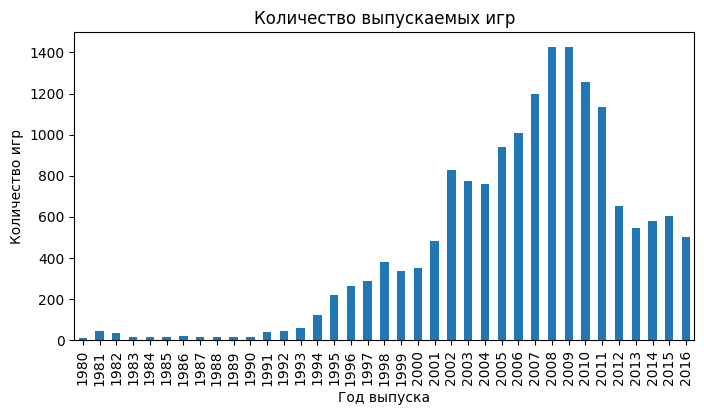

In [18]:
games.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(8, 4));
plt.title('Количество выпускаемых игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

In [19]:
games_filtred = games[(games['year_of_release'] > 1999)]

Убираем неважные года

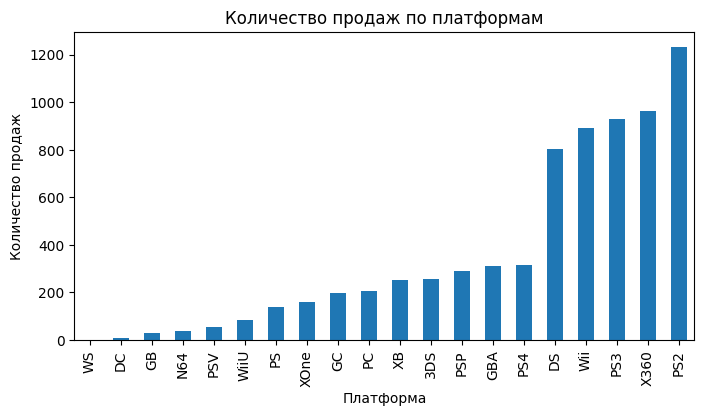

In [20]:
# Посмотрим, как менялись продажи по платформам.
games_filtred.groupby('platform')['all_sales'].sum().sort_values().plot(kind='bar', figsize=(8, 4))
plt.title('Количество продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж');

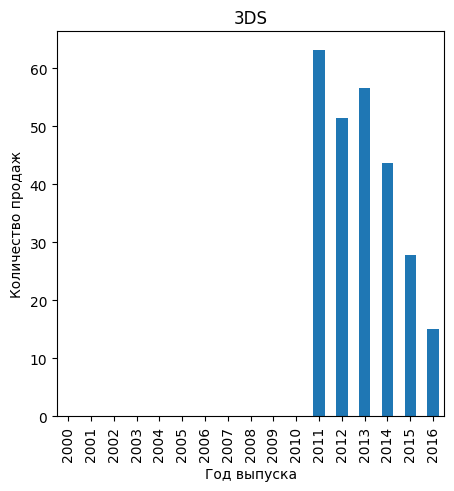

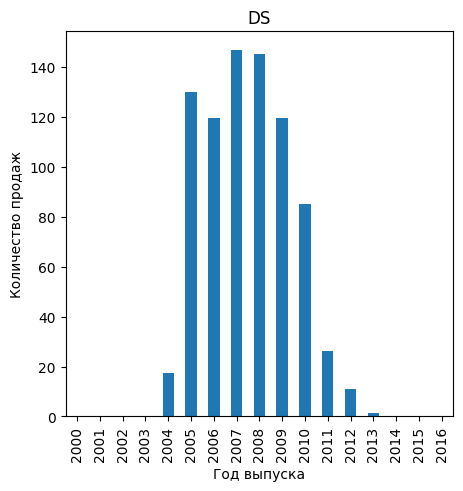

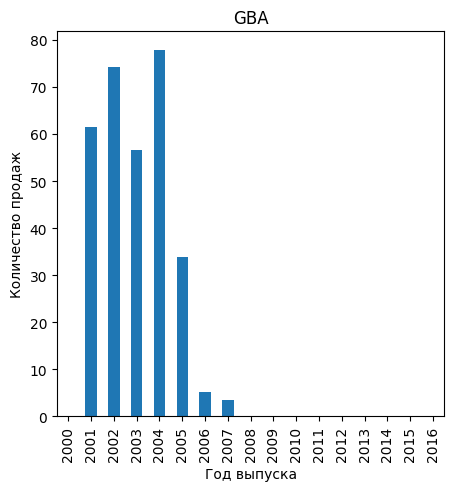

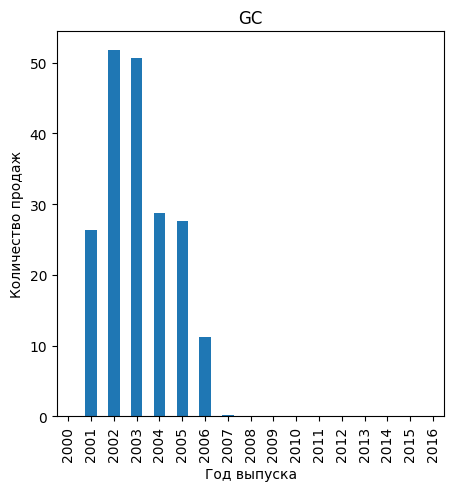

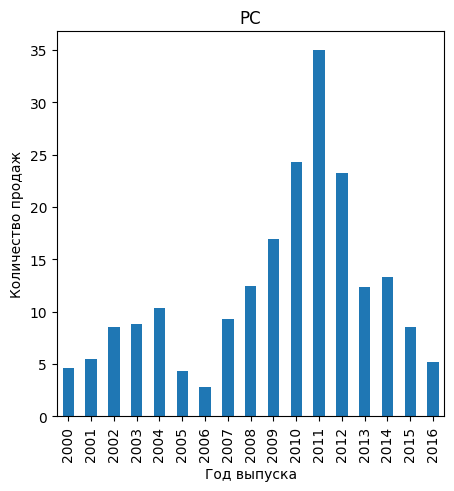

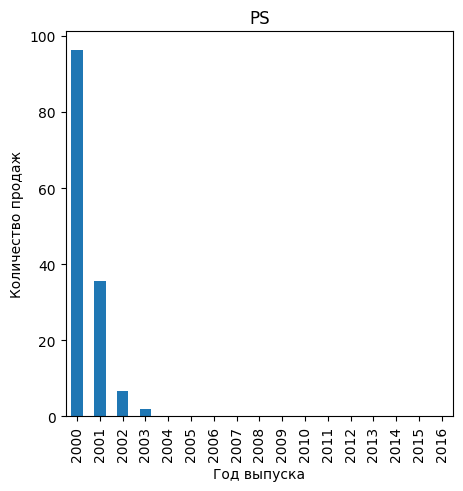

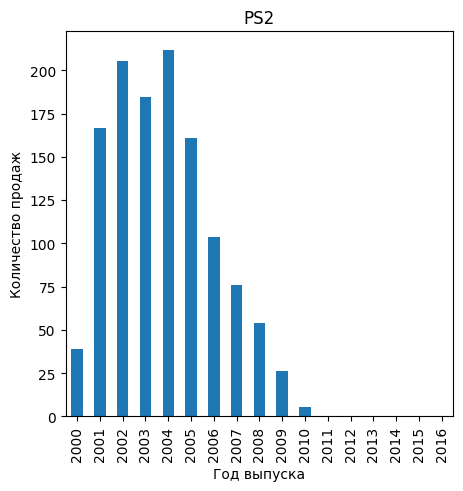

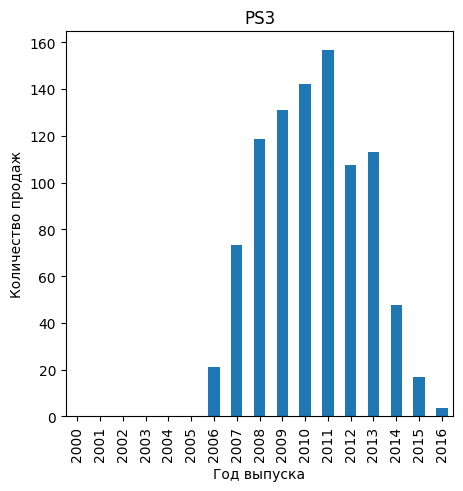

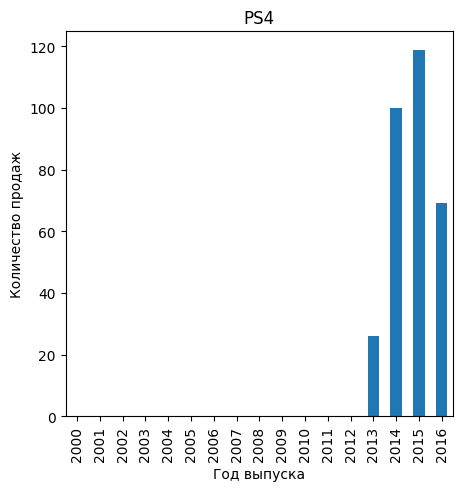

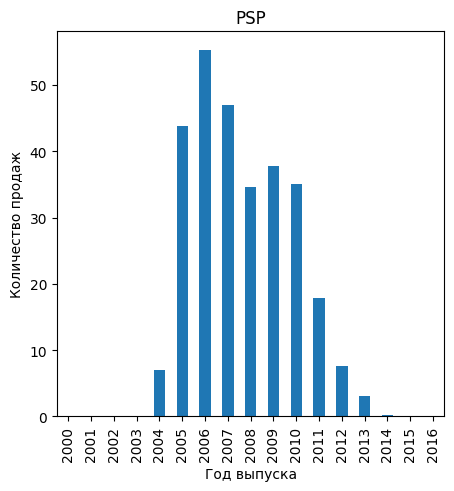

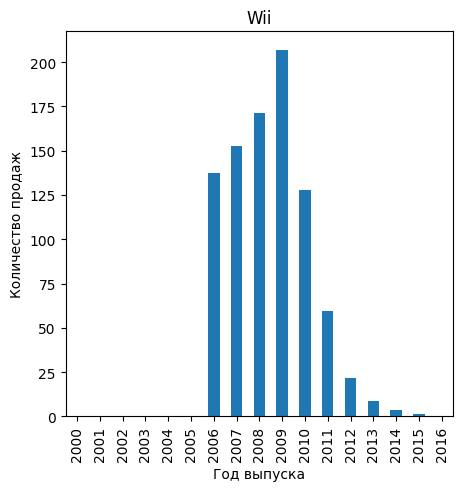

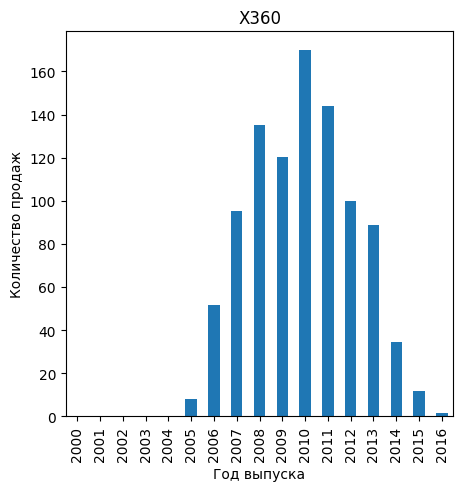

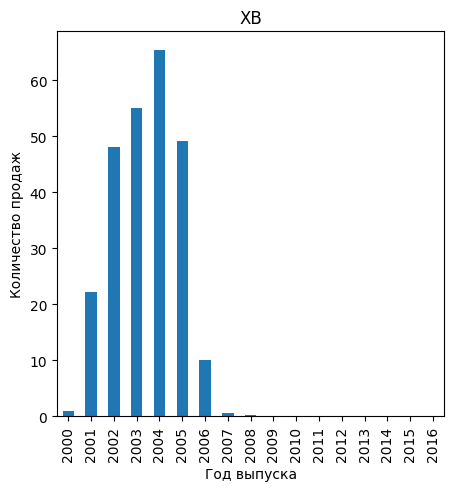

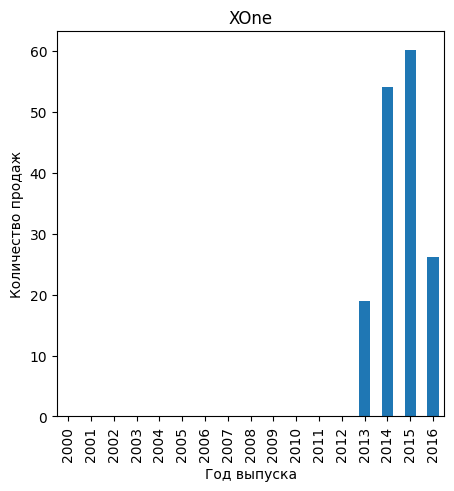

In [21]:
# Выберем платформы суммарными продажами, которых относительно высокие (более 100 млн копий) 
# и построим распределение по годам для каждой платформы 
games_platform = games_filtred.pivot_table(
    index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
for col in games_platform.columns:
    if games_platform[col].sum() > 100:
        games_platform[col].plot(kind='bar', figsize=(5, 5))
        plt.title(col)
        plt.xlabel('Год выпуска')
        plt.ylabel('Количество продаж')
        plt.show()

По распределения можно оценить циклы существования новой платформы 4-10 лет. Выберем актальный период для дальнейшего исследования: с 2014 года.

In [22]:
games_filtred = games_filtred[(games_filtred['year_of_release'] > 2013)]
games_filtred['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Платформа 3DS продажы падают, но еще не упали.

Платформа PC продажи долгое время держатся на плаву, но не звездные продажи в сравнении

Платформа PS4 продажи растут

PS3 уходят прадажи на минимуме(вышла следующее поколение PS4)

Платформа Wii с 2015 ушли с рынка

X360 уходят прадажи на минимуме(вышла следующее поколение XOne)

Платформа XOne продажи растут

Выберем 4 потенциально прибыльные платформы: PS4, XOne, 3DS, PC.

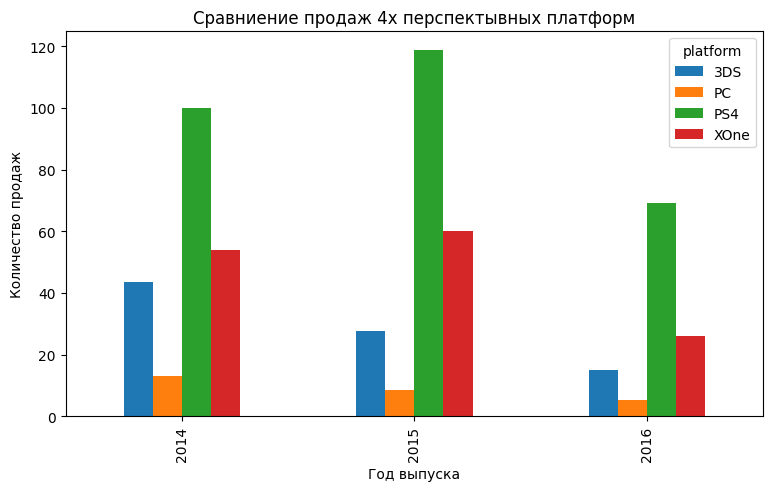

In [23]:
games_filtred = games_filtred[(games_filtred['platform'] == '3DS')|(
    games_filtred['platform'] == 'PC')|(
    games_filtred['platform'] == 'PS4')|(
    games_filtred['platform'] == 'XOne')]
games_filtred.pivot_table(
    index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(
    kind='bar', figsize=(9, 5))
plt.title('Сравниение продаж 4х перспектывных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж');

PS4 лидируют по продажам, следом XOne.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

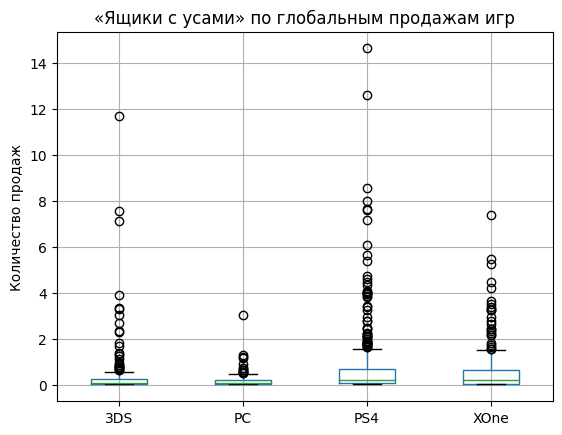

In [24]:
games_filtred.pivot_table(
    index='name', columns='platform', values='all_sales', aggfunc='sum').boxplot()
plt.title('«Ящики с усами» по глобальным продажам игр')
plt.ylabel('Количество продаж');

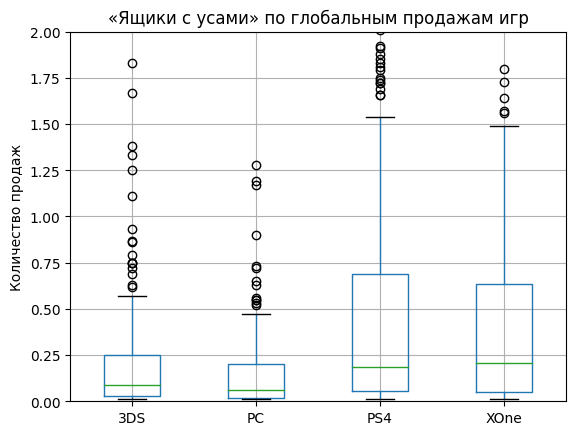

In [25]:
plt.ylim(0,2)
games_filtred.pivot_table(
    index='name', columns='platform', values='all_sales', aggfunc='sum').boxplot()
plt.title('«Ящики с усами» по глобальным продажам игр')
plt.ylabel('Количество продаж');

Построил график «ящик с усами» по глобальным продажам игр в разбивке по платформам. В среднем игры на основных платформах продаюся около 250тыс копий. На это распределение сильное влияние оказывает множество провальных проэктов с продажами близкие к нули, а также супер успешные.

Проверим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

0.4026614106810409

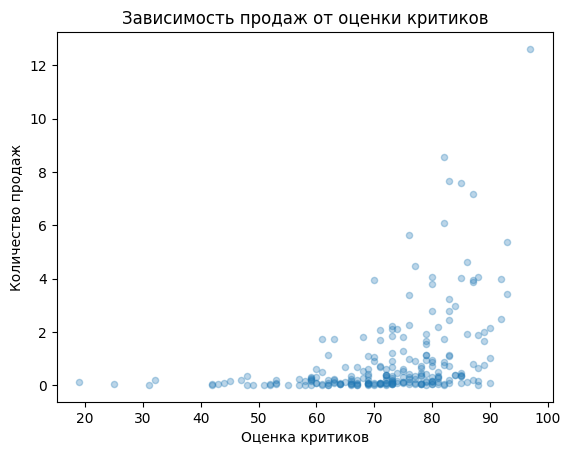

In [26]:
games_ps4 = games_filtred.query('platform == "PS4"')
games_ps4.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж');
games_ps4['critic_score'].corr(games_ps4['all_sales'])

-0.04013158947269733

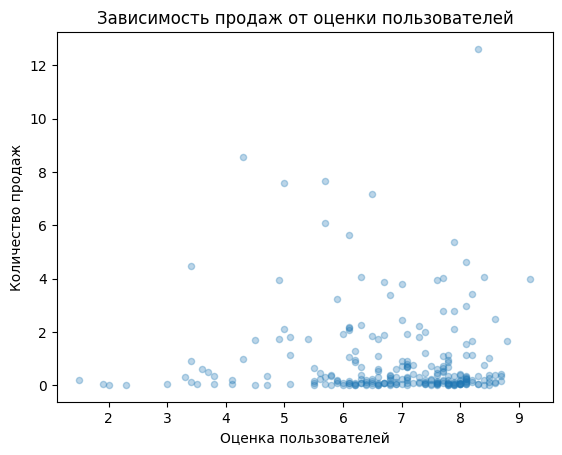

In [27]:
games_ps4.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.3)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж');
games_ps4['user_score'].corr(games_ps4['all_sales'])

Отзывы критиков имеют влияние на продажи игр на платформе ps4.

Отзывы пользователей не оказывают влияние на продажи игрна платформе ps4.

In [28]:
games_pc = games_filtred.query('platform == "PC"')
games_3ds = games_filtred.query('platform == "3DS"')
games_xone = games_filtred.query('platform == "XOne"')
print('оценка критиков на PC:', games_pc['critic_score'].corr(games_pc['all_sales']))
print('оценка критиков на 3DS:', games_3ds['critic_score'].corr(games_3ds['all_sales']))
print('оценка критиков на XOne:', games_xone['critic_score'].corr(games_xone['all_sales']))
print('оценка пользователей на PC:', games_pc['user_score'].corr(games_pc['all_sales']))
print('оценка пользователей на 3DS:', games_3ds['critic_score'].corr(games_3ds['all_sales']))
print('оценка пользователей на XOne:', games_xone['user_score'].corr(games_xone['all_sales']))

оценка критиков на PC: 0.17463413769350036
оценка критиков на 3DS: 0.314117492869051
оценка критиков на XOne: 0.42867694370333187
оценка пользователей на PC: -0.07159665703472451
оценка пользователей на 3DS: 0.314117492869051
оценка пользователей на XOne: -0.07038392806475809


На других платформах оценка критиков тоже влияет на продажи, но немного.
На других платформах оценка пользователей имеет вес на платформе 3DS, но небольшой. На драгих платформах также вообще не влияет.


Посмотрим на общее распределение игр по жанрам.

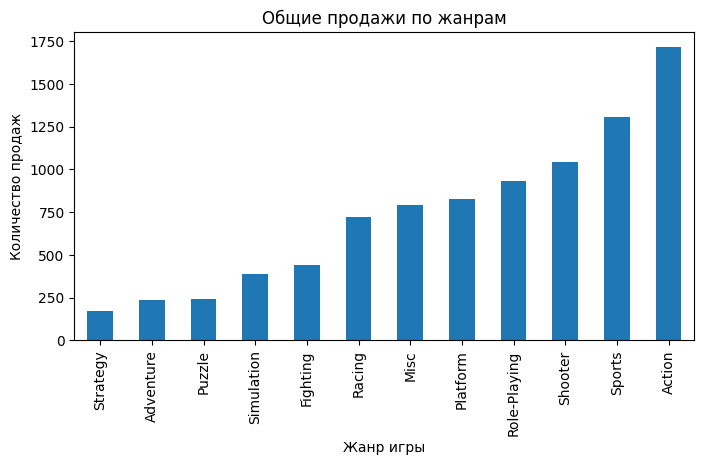

In [29]:
games.groupby('genre')['all_sales'].sum().sort_values().plot(kind='bar', figsize=(8, 4))
plt.title('Общие продажи по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж');

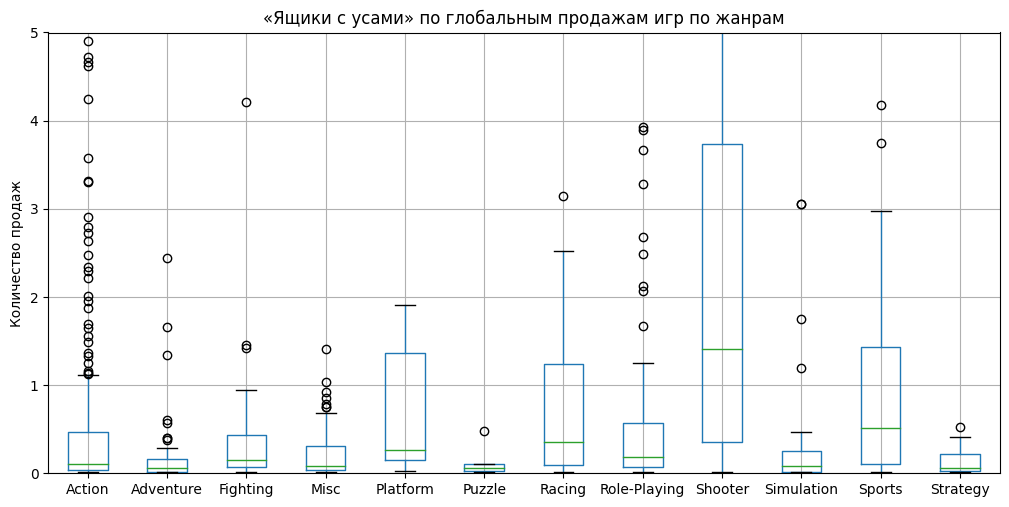

In [30]:
plt.figure(figsize=(10, 5))
plt.ylim(0,5)
games_filtred.pivot_table(
    index='name', columns='genre', values='all_sales', aggfunc='sum').boxplot(figsize=(15, 4))
plt.tight_layout() # Регулируем интервал между подграфиками
plt.title('«Ящики с усами» по глобальным продажам игр по жанрам')
plt.ylabel('Количество продаж');

На боксплотах уже можно увидеть самый стабильный и перспективный жанр Shooter.

В этой части проэкта я провел некоторые исследования.

В начале из распределения продаж по годам видно, что данные до 2000 года не значительны и их можно отбросить.

Из распределения по годам каждой платформы можно еще уменьшить временой период до 2014-2016. Данные из этого  периода  помогут построить прогноз на 2017 год.

Также выберем 4 потенциально прибыльные платформы: PS4, XOne, 3DS, PC. По продажам PS4 лидируют, следом XOne.

В среднем игры на основных платформах продаюся около 250тыс копий. На это распределение сильное влияние оказывает множество провальных проэктов с продажами близкие к нули, а также супер успешные.

Отзывы критиков имеют влияние на продажи игр на платформе ps4.

Отзывы пользователей не оказывают влияние на продажи игрна платформе ps

На других платформах оценка критиков тоже влияет на продажи, но немного. На других платформах оценка пользователей имеет вес на платформе 3DS, но небольшой. На драгих платформах также вообще не влияет.

Из распределения по жанрам можно выделить лидеров продаж. Жанры: Shooter, Sports и Racing. Жанр Shooter самый стабильный и потенциальный. На распределения других жанров сильно влияют провальые и звездные проэкты.


## Портрет пользователя каждого региона.

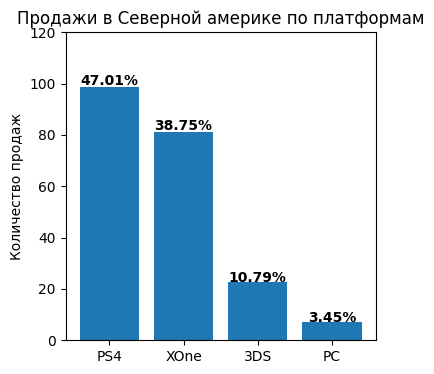

In [31]:
#Создаю таблицу по которой буду строить график
# Продажи в Северной америке по платформам
na_platform_top = games_filtred.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False)
#Добавляем столбец с долями
total_sales = na_platform_top.sum()[0]
percentage = []
for i in range(na_platform_top.shape[0]):
    pct = (na_platform_top.na_sales[i] / total_sales) * 100
    percentage.append(round(pct,2))
na_platform_top['Percentage'] = percentage
#Отобразим график
plt.figure(figsize=(4, 4))
graph = plt.bar(na_platform_top.index, na_platform_top.na_sales)
plt.title('Продажи в Северной америке по платформам')
plt.ylabel('Количество продаж')
i = 0
#Добавим на график доли в процентах на каждый столбик 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(na_platform_top.Percentage[i])+'%', ha='center', weight='bold')
    i+=1
plt.ylim(0,120)
plt.show()

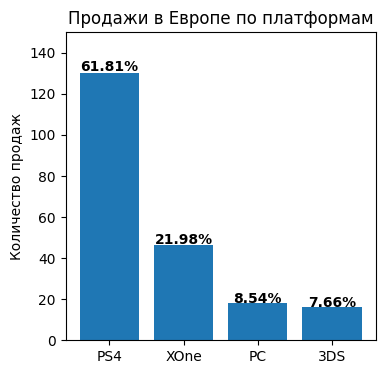

In [32]:
#Создаю таблицу по которой буду строить график
# Продажи в Европе по платформам
eu_platform_top = games_filtred.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False)
#Добавляем столбец с долями
total_sales = eu_platform_top.sum()[0]
percentage = []
for i in range(eu_platform_top.shape[0]):
    pct = (eu_platform_top.eu_sales[i] / total_sales) * 100
    percentage.append(round(pct,2))
eu_platform_top['Percentage'] = percentage
#Отобразим график
plt.figure(figsize=(4, 4))
graph = plt.bar(eu_platform_top.index, eu_platform_top.eu_sales)
plt.title('Продажи в Европе по платформам')
plt.ylabel('Количество продаж')
i = 0
#Добавим на график доли в процентах на каждый столбик 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(eu_platform_top.Percentage[i])+'%', ha='center', weight='bold')
    i+=1
plt.ylim(0,150)
plt.show()

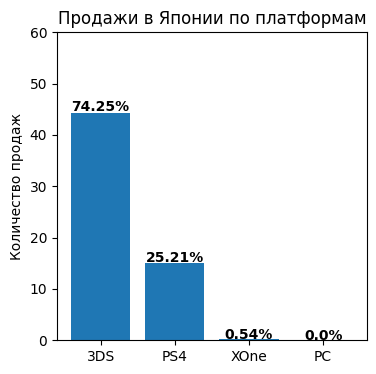

In [33]:
#Создаю таблицу по которой буду строить график
# Продажи в Японии по платформам
jp_platform_top = games_filtred.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False)
#Добавляем столбец с долями
total_sales = jp_platform_top.sum()[0]
percentage = []
for i in range(jp_platform_top.shape[0]):
    pct = (jp_platform_top.jp_sales[i] / total_sales) * 100
    percentage.append(round(pct,2))
jp_platform_top['Percentage'] = percentage
#Отобразим график
plt.figure(figsize=(4, 4))
graph = plt.bar(jp_platform_top.index, jp_platform_top.jp_sales)
plt.title('Продажи в Японии по платформам')
plt.ylabel('Количество продаж')
i = 0
#Добавим на график доли в процентах на каждый столбик 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(jp_platform_top.Percentage[i])+'%', ha='center', weight='bold')
    i+=1
plt.ylim(0,60)
plt.show()

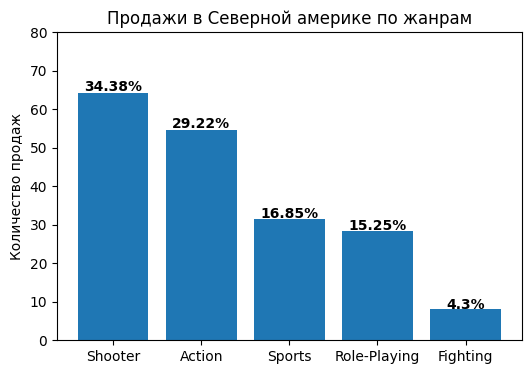

In [34]:
#Создаю таблицу по которой буду строить график
# Продажи в Северной америке по жанрам
na_genre_top = games_filtred.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').sort_values(
    by='na_sales', ascending=False).head()
#Добавляем столбец с долями
total_sales = na_genre_top.sum()[0]
percentage = []
for i in range(na_genre_top.shape[0]):
    pct = (na_genre_top.na_sales[i] / total_sales) * 100
    percentage.append(round(pct,2))
na_genre_top['Percentage'] = percentage
#Отобразим график
plt.figure(figsize=(6, 4))
graph = plt.bar(na_genre_top.index, na_genre_top.na_sales)
plt.title('Продажи в Северной америке по жанрам')
plt.ylabel('Количество продаж')
i = 0
#Добавим на график доли в процентах на каждый столбик 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(na_genre_top.Percentage[i])+'%', ha='center', weight='bold')
    i+=1
plt.ylim(0,80)
plt.show()

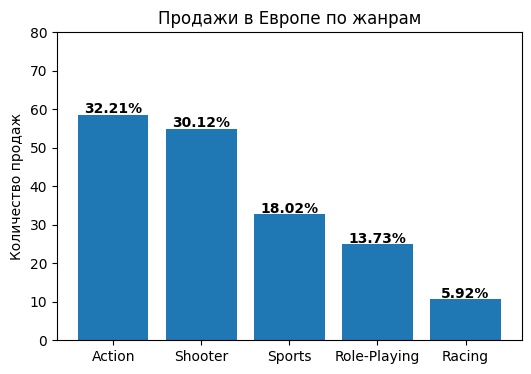

In [35]:
#Создаю таблицу по которой буду строить график
# Продажи в Европе по жанрам
eu_genre_top = games_filtred.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').sort_values(
    by='eu_sales', ascending=False).head()
#Добавляем столбец с долями
total_sales = eu_genre_top.sum()[0]
percentage = []
for i in range(eu_genre_top.shape[0]):
    pct = (eu_genre_top.eu_sales[i] / total_sales) * 100
    percentage.append(round(pct,2))
eu_genre_top['Percentage'] = percentage
#Отобразим график
plt.figure(figsize=(6, 4))
graph = plt.bar(eu_genre_top.index, eu_genre_top.eu_sales)
plt.title('Продажи в Европе по жанрам')
plt.ylabel('Количество продаж')
i = 0
#Добавим на график доли в процентах на каждый столбик 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(eu_genre_top.Percentage[i])+'%', ha='center', weight='bold')
    i+=1
plt.ylim(0,80)
plt.show()

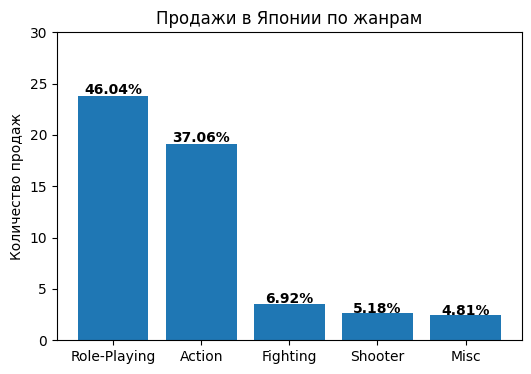

In [36]:
#Создаю таблицу по которой буду строить график
# Продажи в Японии по жанрам
jp_genre_top = games_filtred.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').sort_values(
    by='jp_sales', ascending=False).head()
#Добавляем столбец с долями
total_sales = jp_genre_top.sum()[0]
percentage = []
for i in range(jp_genre_top.shape[0]):
    pct = (jp_genre_top.jp_sales[i] / total_sales) * 100
    percentage.append(round(pct,2))
jp_genre_top['Percentage'] = percentage
#Отобразим график
plt.figure(figsize=(6, 4))
graph = plt.bar(jp_genre_top.index, jp_genre_top.jp_sales)
plt.title('Продажи в Японии по жанрам')
plt.ylabel('Количество продаж')
i = 0
#Добавим на график доли в процентах на каждый столбик 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(jp_genre_top.Percentage[i])+'%', ha='center', weight='bold')
    i+=1
plt.ylim(0,30)
plt.show()

In [37]:
#Распределение рейтингов по продажам в Северной Америке 
na_rating = games_filtred.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_rating['market_share'] = na_rating['na_sales']/na_rating.sum()[0]
#Распределение рейтингов по продажам в Европе
eu_rating = games_filtred.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_rating['market_share'] = eu_rating['eu_sales']/eu_rating.sum()[0]
#Распределение рейтингов по продажам в Японии
jp_rating = games_filtred.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_rating['market_share'] = jp_rating['jp_sales']/jp_rating.sum()[0]
display(na_rating, eu_rating, jp_rating)

,na_sales,market_share
rating,,
M,81.01,0.511427
T,30.06,0.189773
E,29.57,0.186679
E10+,17.76,0.112121


,eu_sales,market_share
rating,,
M,81.44,0.501447
E,39.91,0.245736
T,28.29,0.174189
E10+,12.77,0.078628


,jp_sales,market_share
rating,,
T,7.57,0.377745
M,5.42,0.270459
E,4.82,0.240519
E10+,2.23,0.111277


Составил топ-5 продаж для каждого региона в отдельности по жанрам и платформам. Видно, что вкусы пользователей из разных регионов отличаюся.

Из распределение рейтингов по продажам в отдельных регионах можно увидеть, что рейтинг ESRB оказывает влияние на продажи.

## Проверка гипотез.

Задача 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативную гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [38]:
# Подготовим генеральные совокупности
xone_population = games_filtred.query('platform == "XOne"')['user_score']
xone_population = xone_population.dropna()
pc_population = games_filtred.query('platform == "PC"')['user_score']
pc_population = pc_population.dropna()

In [39]:
alpha = 0.05
results = st.ttest_ind(xone_population, pc_population)
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Задача 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

Альтернативную гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [40]:
# Подготовим генеральные совокупности
action_population = games_filtred.query('genre == "Action"')['user_score']
action_population = action_population.dropna()
sports_population = games_filtred.query('genre == "Sports"')['user_score']
sports_population = sports_population.dropna()

In [41]:
alpha = 0.05
results = st.ttest_ind(action_population, sports_population)
print(f'p-value: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.856201190470744e-09
Отвергаем нулевую гипотезу


Нуливая гипотеза всегда формулируются из равенства, все что кроме это альтернативная. Критерием для проверки гипотез является значение pvalue, которое мы сравниваем с параметром alpha или с уровнем статистистической значимости. Параметр alpha мною задан 5%.

## Общий вывод.

Вывел первые строки данных. Изучил общую информацию о датафрейме. Осуществил предобработку данных. В DF вижу пропуски в столбцах с годом издания, названия игр и жанра - их немного. Эти пропуски не влияют на систему. Предполагаю что они возникли при ошибке ввода(человеческий фактор). Пропусков много в столбцах с рейтинками. Эти пропуски связоны с тем что рейтинговые организации оценивают не все игры. 

Провел исследовательский анализ данных. Для анализа я выбрал временой период до 2014-2016. Данные из этого периода помогут построить прогноз на 2017 год. Также выбрал 4 потенциально прибыльные платформы: PS4, XOne, 3DS, PC. По продажам PS4 лидируют, следом XOne. В среднем игры на основных платформах продаюся около 250тыс копий. На это распределение сильное влияние оказывает множество провальных проэктов с продажами близкие к нули, а также супер успешные.

Отзывы критиков имеют влияние на продажи игр на платформе ps4. Отзывы пользователей не оказывают влияние на продажи игрна платформе ps4.

На других платформах оценка критиков тоже влияет на продажи, но немного. На других платформах оценка пользователей имеет вес на платформе 3DS, но небольшой. На драгих платформах также вообще не влияет.

Из распределения по жанрам можно выделить лидеров продаж. Жанры: Shooter, Sports и Racing. Жанр Shooter самый стабильный и потенциальный. На распределения других жанров сильно влияют провальные и звездные проэкты.

Составил портреты пользователей каждого региона, по таблицам топ-5 можно узнать какие платформы и жанры пользователи предпочитают. Предпочтения по регионам отличаются.

Выяснил также, что рейтинг ESRB оказывает влияние на продажи.

Проверил гипотезы:

Задача 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Альтернативную гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные. Ответ: Можно сказать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Задача 2. Средние пользовательские рейтинги жанров Action и Sports разные. Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sport одинаковые. Альтернативную гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные. Ответ: Средние пользовательские рейтинги жанров Action и Sports разные.

Мои рекоммендации интернет-магазину «Стримчик»: 

При планировании маркетинговой компании на 2017 год следует обратить внимание на платформы PS4, XOne, 3DS, PC.
Обратить внимание на жанры Shooter, Sports и Racing. При этом учитывать регион продаж, оценки критиков и рейтинг компьютерных игр ESRB. 